# Missing value imputation: imputers

In this notebook, I will show you how to use the different missing values imputers available in feature_engine.

For the demo, I will use the house price dataset, available in [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from importlib import reload

from feature_engine import missing_data_imputers as msi

In [2]:
def load_houseprice():
    data = pd.read_csv('houseprice.csv')
    return data

In [3]:
data = load_houseprice()
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### MeanMedianImputer

The MeanMedianImputer replaces NA in numerical variables by either the mean or the median value of the variable.

#### Median

In [4]:
data[['LotFrontage', 'MasVnrArea']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
dtype: float64

In [5]:
median_imputer = msi.MeanMedianImputer(imputation_method='median', variables = ['LotFrontage', 'MasVnrArea'])
median_imputer.fit(data)

MeanMedianImputer(imputation_method='median',
         variables=['LotFrontage', 'MasVnrArea'])

In [6]:
# dictionary with the mappings for each variable
median_imputer.imputer_dict_

{'LotFrontage': 69.0, 'MasVnrArea': 0.0}

In [7]:
# let's corroborate that the dictionary above contains the mean values of th variables
data[['LotFrontage', 'MasVnrArea']].median()

LotFrontage    69.0
MasVnrArea      0.0
dtype: float64

In [8]:
# transform the data
data_tf = median_imputer.transform(data)

# and check we no longer have NA
data_tf[['LotFrontage', 'MasVnrArea']].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

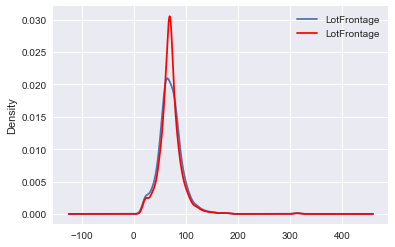

In [9]:
# we can see that the distribution has changed slightly with now more values accumulating towards the median
fig = plt.figure()
ax = fig.add_subplot(111)
data['LotFrontage'].plot(kind='kde', ax=ax)
data_tf['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Mean, for only 1 variable

In [10]:
data = load_houseprice()
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
mean_imputer = msi.MeanMedianImputer(imputation_method='mean', variables = 'LotFrontage')
mean_imputer.fit(data)

MeanMedianImputer(imputation_method='mean', variables=['LotFrontage'])

In [12]:
mean_imputer.imputer_dict_

{'LotFrontage': 70.04995836802665}

In [13]:
# transform the data
data_tf = mean_imputer.transform(data)

# and check we no longer have NA
data_tf['LotFrontage'].isnull().sum()

0

### Automatically select all numerical variables

If no variable list is indicated, the imputer will select all numerical variables in the dataset

In [14]:
data = load_houseprice()
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
mean_imputer = msi.MeanMedianImputer(imputation_method='mean')
mean_imputer.fit(data)

MeanMedianImputer(imputation_method='mean',
         variables=['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedr...'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'])

In [16]:
mean_imputer.variables

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

It doesn't matter whether the variables show NA or not. A dictionary will be created for each variable. Only variables with NA will be filled during the transform.

## EndTailImputer

The EndTailImputer replaces the NA by a value located at the end of the variable distribution. You can select both Gaussian and skewed distributions, and also a place in the left or right  tail.

### Gaussian distribution and right tail

In [17]:
data = load_houseprice()

In [18]:
tail_imputer = msi.EndTailImputer(distribution='gaussian', tail='right',
                                    fold=3, variables = ['LotFrontage', 'MasVnrArea'])
tail_imputer.fit(data)

EndTailImputer(distribution='gaussian', fold=3, tail='right',
        variables=['LotFrontage', 'MasVnrArea'])

In [19]:
tail_imputer.imputer_dict_

{'LotFrontage': 142.9042136914762, 'MasVnrArea': 646.8838814696435}

In [20]:
# transform the data
data_tf = tail_imputer.transform(data)

# and check we no longer have NA
data_tf['LotFrontage'].isnull().sum()

0

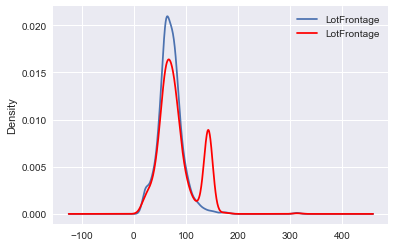

In [21]:
# we can see that the distribution has changed slightly with more values accumulating towards the right tail
fig = plt.figure()
ax = fig.add_subplot(111)
data['LotFrontage'].plot(kind='kde', ax=ax)
data_tf['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Skewed distribution, left tail

In [22]:
tail_imputer = msi.EndTailImputer(distribution='skewed', tail='left',
                                    fold=3, variables = ['LotFrontage', 'MasVnrArea'])
tail_imputer.fit(data)

EndTailImputer(distribution='skewed', fold=3, tail='left',
        variables=['LotFrontage', 'MasVnrArea'])

In [23]:
tail_imputer.imputer_dict_

{'LotFrontage': -4.0, 'MasVnrArea': -498.0}

In [24]:
data_tf = tail_imputer.transform(data)
data_tf[['LotFrontage', 'MasVnrArea']].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

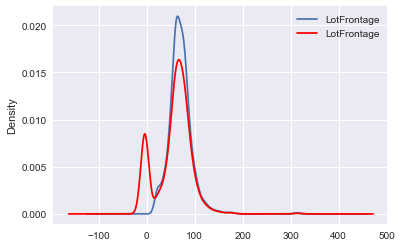

In [25]:
# we can see that the distribution has changed slightly with now more values
#  accumulating towards the  left tail
fig = plt.figure()
ax = fig.add_subplot(111)
data['LotFrontage'].plot(kind='kde', ax=ax)
data_tf['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## CategoricalVariableImputer

This imputer works only for categorical variables. It replaces the NA by a new label: "Missing"

In [26]:
data = load_houseprice()
data[['Alley', 'MasVnrType']].head()

,Alley,MasVnrType
0,NaN,BrkFace
1,NaN,None
2,NaN,BrkFace
3,NaN,None
4,NaN,BrkFace


In [27]:
data[['Alley', 'MasVnrType']].isnull().mean()

Alley         0.937671
MasVnrType    0.005479
dtype: float64

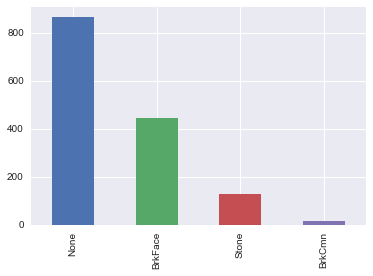

In [28]:
data['MasVnrType'].value_counts().plot.bar()

In [29]:
addLabel_imputer = msi.CategoricalVariableImputer(variables = ['Alley', 'MasVnrType'])
addLabel_imputer.fit(data)

CategoricalVariableImputer(variables=['Alley', 'MasVnrType'])

In [30]:
data_tf = addLabel_imputer.transform(data)

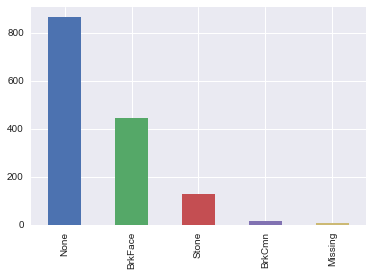

In [31]:
# we can observe in the below plot, the presence of a new category, where before there were NA
data_tf['MasVnrType'].value_counts().plot.bar()

## FrequentCategoryImputer

The FrequentCategoryImputer works only with categorical variables. It replaces the NA by the most frequent label, this is by the most popular label in the dataset, for a specific variable.

In [32]:
data = load_houseprice()
data['MasVnrType'].head()

0    BrkFace
1       None
2    BrkFace
3       None
4    BrkFace
Name: MasVnrType, dtype: object

In [33]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [34]:
frequentLabel_imputer = msi.FrequentCategoryImputer(variables = 'MasVnrType')
frequentLabel_imputer.fit(data)

FrequentCategoryImputer(variables=['MasVnrType'])

In [35]:
frequentLabel_imputer.imputer_dict_

{'MasVnrType': 'None'}

In [36]:
data = frequentLabel_imputer.transform(data)
data['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

See how the number of observations for None in MasVnrType has increased from 864 to 872, thanks to replacing the NA with this label in the dataset.

### Automatically select categorical variables

When no variable list is passed when calling the imputer, all categorical variables will be selected by the imputer

In [37]:
data = load_houseprice()

In [38]:
frequentLabel_imputer = msi.FrequentCategoryImputer()
frequentLabel_imputer.fit(data)
frequentLabel_imputer.imputer_dict_

{'Alley': 'Grvl',
 'BldgType': '1Fam',
 'BsmtCond': 'TA',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'Unf',
 'BsmtFinType2': 'Unf',
 'BsmtQual': 'TA',
 'CentralAir': 'Y',
 'Condition1': 'Norm',
 'Condition2': 'Norm',
 'Electrical': 'SBrkr',
 'ExterCond': 'TA',
 'ExterQual': 'TA',
 'Exterior1st': 'VinylSd',
 'Exterior2nd': 'VinylSd',
 'Fence': 'MnPrv',
 'FireplaceQu': 'Gd',
 'Foundation': 'PConc',
 'Functional': 'Typ',
 'GarageCond': 'TA',
 'GarageFinish': 'Unf',
 'GarageQual': 'TA',
 'GarageType': 'Attchd',
 'Heating': 'GasA',
 'HeatingQC': 'Ex',
 'HouseStyle': '1Story',
 'KitchenQual': 'TA',
 'LandContour': 'Lvl',
 'LandSlope': 'Gtl',
 'LotConfig': 'Inside',
 'LotShape': 'Reg',
 'MSZoning': 'RL',
 'MasVnrType': 'None',
 'MiscFeature': 'Shed',
 'Neighborhood': 'NAmes',
 'PavedDrive': 'Y',
 'PoolQC': 'Gd',
 'RoofMatl': 'CompShg',
 'RoofStyle': 'Gable',
 'SaleCondition': 'Normal',
 'SaleType': 'WD',
 'Street': 'Pave',
 'Utilities': 'AllPub'}

## RandomSampleImputer

The RandomSampleImputer works for both categorical and numerical variables. It will extract a random sample from the observations where data is available, and use it to replace the NA.

When no variable list is passed, it will default to all variables in the dataset.

In [39]:
data = load_houseprice()
data[['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea']].isnull().mean()

Alley          0.937671
MasVnrType     0.005479
LotFrontage    0.177397
MasVnrArea     0.005479
dtype: float64

In [40]:
# note that the imputer has a random_state option for reproducibility
random_imputer = msi.RandomSampleImputer(variables = ['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea'])
random_imputer.fit(data)

RandomSampleImputer(random_state=0,
          variables=['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea'])

In [41]:
# the imputer saves a copy of the variables from the training set to impute new data
random_imputer.X.head()

,Alley,MasVnrType,LotFrontage,MasVnrArea
0,NaN,BrkFace,65.0,196.0
1,NaN,None,80.0,0.0
2,NaN,BrkFace,68.0,162.0
3,NaN,None,60.0,0.0
4,NaN,BrkFace,84.0,350.0


In [42]:
data_tf = random_imputer.transform(data)

In [43]:
data_tf[['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea']].isnull().mean()

Alley          0.0
MasVnrType     0.0
LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

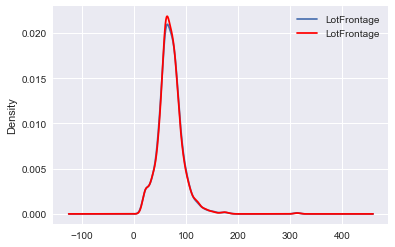

In [44]:
# when using the random sample imputer, the distribution of the variable does not change
fig = plt.figure()
ax = fig.add_subplot(111)
data['LotFrontage'].plot(kind='kde', ax=ax)
data_tf['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Automatically select all variables

In [45]:
data = load_houseprice()

random_imputer = msi.RandomSampleImputer(random_state = 29)
random_imputer.fit(data)

RandomSampleImputer(random_state=29,
          variables=['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Roo...C', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'])

In [46]:
random_imputer.X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
random_imputer.variables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

## AddNaNBinaryImputer

AddNaNBinaryImputer adds an additional column per indicated variable, indicating if the observation is missing. It adds an additional binary variable that indicates 1 if the observation contains a NaN or 0 otherwise.

Imputer works for both numerical and categorical variables.

In [48]:
data = load_houseprice()
data[['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea']].isnull().mean()

Alley          0.937671
MasVnrType     0.005479
LotFrontage    0.177397
MasVnrArea     0.005479
dtype: float64

In [49]:
addBinary_imputer = msi.AddNaNBinaryImputer(variables = ['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea'])
addBinary_imputer.fit(data)

AddNaNBinaryImputer(variables=['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea'])

In [50]:
# After transformation we see the binary _na variable for each of the indicated variables
data = addBinary_imputer.transform(data)
data[['Alley_na', 'MasVnrType_na', 'LotFrontage_na', 'MasVnrArea_na']].head()

,Alley_na,MasVnrType_na,LotFrontage_na,MasVnrArea_na
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [51]:
data[['Alley_na', 'MasVnrType_na', 'LotFrontage_na', 'MasVnrArea_na']].mean()

Alley_na          0.937671
MasVnrType_na     0.005479
LotFrontage_na    0.177397
MasVnrArea_na     0.005479
dtype: float64

### Automatically select the variables

When no variable list is indicated, the imputer selects all variables.

In [52]:
data = load_houseprice()

addBinary_imputer = msi.AddNaNBinaryImputer()
addBinary_imputer.fit(data)

AddNaNBinaryImputer(variables=['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Roo...C', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'])

In [53]:
data.shape

(1460, 81)

In [54]:
# we can see that after transforming the dataset, we obtain double number of columns
data = addBinary_imputer.transform(data)
data.shape

(1460, 162)

## ArbitraryNumberImputer

ArbitraryNumberImputer replaces NA by an arbitrary value. It works for numerical variables. The arbitrary value needs to be defined by the user.

In [55]:
data = load_houseprice()
data[['LotFrontage', 'MasVnrArea']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
dtype: float64

In [56]:
arbitrary_imputer = msi.ArbitraryNumberImputer(arbitrary_number = -999, variables = ['LotFrontage', 'MasVnrArea'])
arbitrary_imputer.fit(data)

ArbitraryNumberImputer(arbitrary_number=-999,
            variables=['LotFrontage', 'MasVnrArea'])

In [57]:
data_tf = arbitrary_imputer.transform(data)
data_tf[['LotFrontage', 'MasVnrArea']].min()

LotFrontage   -999.0
MasVnrArea    -999.0
dtype: float64

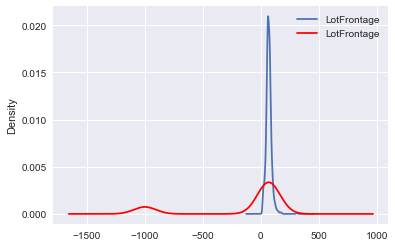

In [58]:
# we can see that the distribution has changed slightly with now more values accumulating towards the median
fig = plt.figure()
ax = fig.add_subplot(111)
data['LotFrontage'].plot(kind='kde', ax=ax)
data_tf['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')